# Maths Ordinary Differential Equations

## Numerical Methods for ODEs

* In this Python workbook we will implement several methods for solving ordinary differential equations using numerical methods.


* The methods we investigate include Euler's method, the Euler-Heun method and the Euler method for a system of ODEs.


* Each of these methods will be covered in lectures also.


* The purpose of this Python workbook is to compliment these lectures and implement the methods as they normally are in research and industry.

## Importing Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__import__ is a function that instructs Python to import the numpy library of functions and give it the abbreviated name np.

__numpy__ is a library of functions, and contains several functions we are familiar with from lectures and from our scientific calculators. 

__maptplotlib.pyplot__ is a library of Python functions we will use for plotting solutions of ODEs and any other functions we may want to visualise.

## Code cells & Markdown cells

* In these Python work books, there are two types of cells we will use.

#### Code Cells

* The first of these are __code__ cells, where we type and run actual code. To run a code cell press __Shift+Enter__ together.

#### Markdown Cells

* The other type of cell is called a __markdown__ cell. The current cell is an example of a markdown cell. It is useful for presenting text when we want to explain code or equations. The edit a markdown cell double click it. Then press __Shit+Enter__ to render it in regular text.

# Euler's Method



## Euler's method in theory

* Euler's method is used to solve ordinary differential equations of the form
\\[\frac{dy}{dx}=f(x,y),\\]
where $f(x,y)$ is some (possilby nonlinear) function of $x$ and $y$.



* The basic idea behind Euler's method is the derivative is formally defined as
\\[\frac{dy}{dx}=\lim_{h\to0}\frac{y(x+h)-y(x)}{h},\\]

    and so for a __small__ but finite value of $h$ we may make the approximation

\\[\frac{dy}{dx}\approx\frac{y(x+h)-y(x)}{h}.\\]


* This means, if we know $y(x)$ and $\frac{dy}{dx}$ at $x$, then we can _step x forward__ by $h$ to fins $y(x+h)$, using
\\[y(x+h)\approx y(x)+h\frac{dy}{dx}.\\]


* The next part of the idea is using the fact that the ODE allowes us to rewrite $\frac{dy}{dx}$ in terms of $y(x)$ alone, i.e. it is just the right-hand side of the ODE, and so we have
\\[y(x+h)\approx y(x)+hf(x,y(x)).\\]

## Euler's Method - Example 1

* In this section we will go through the steps of creating the Euler method to solve the simple ODE
\\[\frac{dy}{dx}=\frac{x}{y},\quad y(1.2)=4.3,\\]
    and find its value at $x=1.5$.



* This ODE is nonlinear it can be solved directly, without numerical methods. The __exact__ solution is

\\[y(x)=(x^2+17.05)^{\frac{1}{2}}\\]


* However, it is a useful example to from which to impliment Euler's method using Python.


* It has the added advantage that we can __compare__ the answer we get using __Euler's method__ with the known __exact__ answer.


* The first step is to create a Python function to represent $f(x,y)$. 

In [129]:
def f(x,y):
    return x/y

Next we define the __number of steps__ we want to use to estimate $y(1.5)$. We will use $N=20$, however this is easily changed in the cell below.

In [119]:
N=20

The __step-size__ is now given by
\\[h=\frac{1.5-1.2}{20}.\\]

In [120]:
h=(1.5-1.2)/N
h

0.015000000000000003

Now we create a __FOR LOOP__ which will implement each step of Euler's method 20 times. However, we first __initialize__ Python: 

### Initialisation

* When using computers to implement these numerical methods, it is usually necessary to initialise the varaibles __x__ and __y__.


* This usually means first setting these variables to be initially zero, i.e. it is our first guess for the soulution.

##### Note: This is not the same as setting the initial condition y(1.2)=4.3. 

In [121]:
x=np.zeros(N)
y=np.zeros(N)

In [122]:
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [123]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

##### We are basically creating a structure to represent  __x, y__ so that a for loop can be applied later on.

### Initial Data

* Next we implement the actual __initial data__ given as part of the initial value problem. 


* This is easily done in Python as follows:

In [125]:
x0=1.2
y0=4.3

### The FOR LOOP

* The __FOR LOOP__ is the Python code which will actully apply Euler's method 20 times to give us the solution we seek:

In [126]:
for i in range (1,N):
    x[0]=x0
    y[0]=y0
    x[i]=x[i-1]+h
    y[i] = y[i-1] + h*f(x[i-1],y[i-1])

In [127]:
y

array([ 4.3       ,  4.30418605,  4.3084203 ,  4.31270261,  4.31703284,
        4.32141085,  4.32583648,  4.33030961,  4.33483007,  4.33939772,
        4.34401242,  4.34867401,  4.35338234,  4.35813726,  4.36293863,
        4.36778628,  4.37268006,  4.37761982,  4.38260541,  4.38763666])

In [128]:
x

array([ 1.2  ,  1.215,  1.23 ,  1.245,  1.26 ,  1.275,  1.29 ,  1.305,
        1.32 ,  1.335,  1.35 ,  1.365,  1.38 ,  1.395,  1.41 ,  1.425,
        1.44 ,  1.455,  1.47 ,  1.485])

### The exact solution

* As was noted in the introduction to this example, this ODE has a exact solution, which is given by

\\[y(x)=\sqrt{x^2+17.05}.\\]


* We create a Python function to represent this solution as follows:

In [130]:
def y_exact(x):
    return (x**2+17.05)**(1.0/2.0)

The exact values of $y$ at each of the values of $x$ above are given by

In [131]:
y_exact(x)

array([ 4.3       ,  4.30421015,  4.30846841,  4.31277463,  4.31712868,
        4.3215304 ,  4.32597966,  4.3304763 ,  4.33502018,  4.33961116,
        4.34424907,  4.34893378,  4.35366512,  4.35844296,  4.36326712,
        4.36813747,  4.37305385,  4.3780161 ,  4.38302407,  4.3880776 ])

## Plotting the Solutions

* A very useful way of seeing how close Euler's method is to the actual solution is to plot both ranges of values obtained above, on the same graph.


* This is implemented in Python as follows:

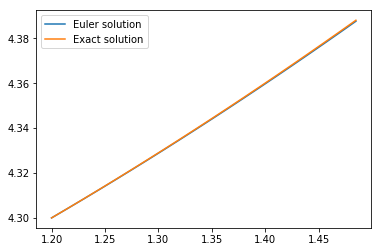

In [132]:
plt.plot(x,y,label='Euler solution')
plt.plot(x,y_exact(x),label='Exact solution')
plt.legend()

* We see that the numerical and exact values are  close, however there are some small discrepancies.


* To reduce these differences we increase the number of steps __N__.


* This has the effect of reducing the step-size __h__, which gives a better approximation for the derivative.


* Increase the the number of steps to __N=100__, and compare the numerical and  exact solutions again.

## Exercise 1:

The initial value problem

\\[\frac{dy}{dx}=\frac{x}{\sqrt{y}},\quad y(1.5)=6.8\\]

has an exact solution

\\[y(x)=\left(0.75x^2+16.044730542151203\right)^{\frac{2}{3}}.\\]


1. Use __250 steps__ of Euler's method in the code above to find the solution at $x=4.0$.


2. Plot the exact solution and Eulers solution on the same graph to compare asnwers.


3. Is there much difference between the two answers?


4. Increase the number of steps to 1000 and compare the graphs again. Are the graphs a closer match? 